In [6]:
# importations
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from mne.preprocessing import ICA
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy.stats import zscore
import glob

## The bit about generating TFRs

### Cleaned bit:

In [1]:
def give_me_all_tfrs(tfr, ch):
    all_tr_tfrs = dict()
    dat = tfr.copy().pick_channels([ch]).data
    for n, tr in enumerate(dat):
        all_tr_tfrs[n] = tr[0]
    return all_tr_tfrs
    

In [2]:
def give_me_tfr_dict(epochs):
    
    freqs = np.logspace(*np.log10([1, 100]), num=50)
    n_cycles = freqs / 2.  # different number of cycle per frequency


    power = mne.time_frequency.tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=False, # wtf is n_cycle?
                            return_itc=False, decim=3, n_jobs=-1,
                                              average=False)
    
    just_everything = dict()
    chs = epochs.ch_names
    i=0
    for ch in chs:
        print(f'Working on channel {ch}, {i}')
        i+=1
        just_everything[ch] = give_me_all_tfrs(power, ch)
        
        avg = np.zeros_like(just_everything[ch][0])
        for n in just_everything[ch]:
            avg += just_everything[ch][n]
        avg = avg/len(just_everything[ch])
        just_everything[ch]['avg'] = avg
        
    return just_everything

In [4]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
save_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/tfr_pickles_no_fft/'

In [3]:
def pickle_me_tfrs(sub, epochs_dir=processed_dir, save_dir=save_dir):
    files = sorted(glob.glob(f'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*{sub}*final*fif'))
    for block in files:
        ses_name = block.split('/')[-1][:-8]
        print(ses_name)
        epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')
        just_everything = give_me_tfr_dict(epochs)
        with open(save_dir+ses_name+'.pkl', 'wb') as f:
            pickle.dump(just_everything, f)
        del f
        del just_everything

In [ ]:
all_subs = ['sub20', 'sub22', 'sub02']

for sub in all_subs:
    pickle_me_tfrs(sub)

sub20_ses00_final
Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses00_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.7s


In [ ]:
##############

In [371]:
processed_dir = '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/'
ses_name = 'sub22_ses03_final'
epochs = mne.read_epochs(processed_dir+ses_name+'-epo.fif')

Reading /external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub22_ses03_final-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1800.00 ms
        0 CTF compensation matrices available
Not setting metadata
25 matching events found
No baseline correction applied
0 projection items activated


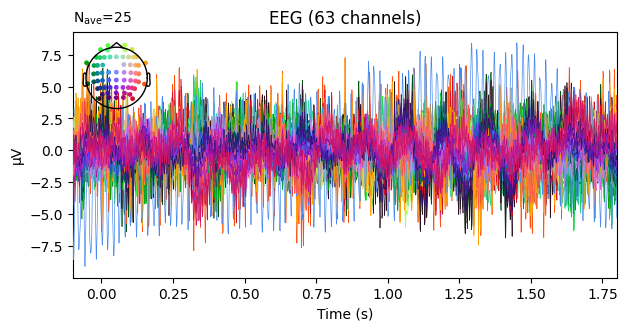

In [372]:
epochs.copy().average().plot();

In [373]:
freqs = np.logspace(*np.log10([1, 100]), num=50)
print(freqs)

[  1.           1.09854114   1.20679264   1.32571137   1.45634848
   1.59985872   1.75751062   1.93069773   2.12095089   2.32995181
   2.55954792   2.8117687    3.0888436    3.39322177   3.72759372
   4.09491506   4.49843267   4.94171336   5.42867544   5.96362332
   6.55128557   7.19685673   7.90604321   8.68511374   9.54095476
  10.48113134  11.51395399  12.64855217  13.89495494  15.26417967
  16.76832937  18.42069969  20.23589648  22.22996483  24.42053095
  26.82695795  29.47051703  32.37457543  35.56480306  39.06939937
  42.9193426   47.14866363  51.79474679  56.89866029  62.50551925
  68.6648845   75.43120063  82.86427729  91.0298178  100.        ]


In [8]:
files = sorted(glob.glob('/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/*sub20*final*fif'))
files

['/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses00_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses01_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses02_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses03_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses04_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses05_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses06_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses07_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/preprocessed/sub20_ses08_final-epo.fif',
 '/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/bme1500/p